# Numerical Optimization

In this course, we will look at problems of the form
$$
\min_{x \in C} f(x).
$$
Our goal will be to find a point $x_* \in C$ that achieves the minimum value of $f$ over $C$, that is, $f(x_*) \leq f(x)$ for any $x \in C$.

A bit of vocabulary:
- $f$ is called the *objective function*,
- $C$ is the *constraint set* or *admissible set*,
- $x_*$ will be called a global minimizer of $f$ over $C$.

In these practical sessions, we will implement iterative algorithms which, hopefully, will be able to generate sequences $\{ x_k \}$ such that $x_k \rightarrow x_*$.

## Practical session 1: The basics

The goal of this practical session is to understand how to structure an optimization programming project, and to develop an understanding of optimization concepts such as level sets, local and global minimizers, or stationary points.

### 1) Structuring an optimization programming project

A common way to structure such projects is to adopt a three-part division:
- a *problem* part, where all the information and code related to the considered problem (evaluation of $f$, of $\nabla f$, test for verifying if $x \in C$,...) are implemented,
- an *algorithmic* part, where algorithms can be implemented in a way that is independent of any particular objective function,
- a *run* or *main* part, in which algorithms are run and results are displayed and analyzed.

Note that it is often useful to include a fourth part where all utilitary functions are implemented (for plotting for instance).

Most of the times, optimization algorithms will use functions that evaluate $f$, $\nabla f$, or $\nabla^2 f$.
These functions are respectively called the *zeroth-order*, *first-order* and *second-order* *oracles* of $f$, and are to be implemented in the "problem part" of the code.

This structure has the benefit of being very modular: it is very easy to add a new algorithm, or to solve another problem using algorithms we just implemented. 

During this practical session, `problem1.py`, `problem2.py`, and `problem3.py` will the be the *problem* parts, `algorithms.py` will be the algorithmic part, `session1.ipynb` will be the *main* part, and `utils.py` will contain utilitary functions for plotting.

##### 1.a) A quadratic problem in dimension 2

In this first exercise, we will consider an objective function $f_1$ of the form $f(x) = \frac{1}{2} x^\top A x$ and the admissible set $C = \mathbb{R}^2$.
Oracles associated to $f_1$ are already implemented in `problem1.py`.

> Go check `problem1.py` to see how the code is organized and import the oracles associated to $f_1$ from there using the following command.

In [17]:
import problem1 as pb1

The levels sets of a function $f$ are the sets $S^f_\alpha = \{ x \in \textrm{domain} f \mid f(x) = \alpha \}$, where $\alpha \in \mathbb{R}$.
These sets reveal lots of information about the properties of $f$. 

> Run the following command to plot the level sets of $f_1$.

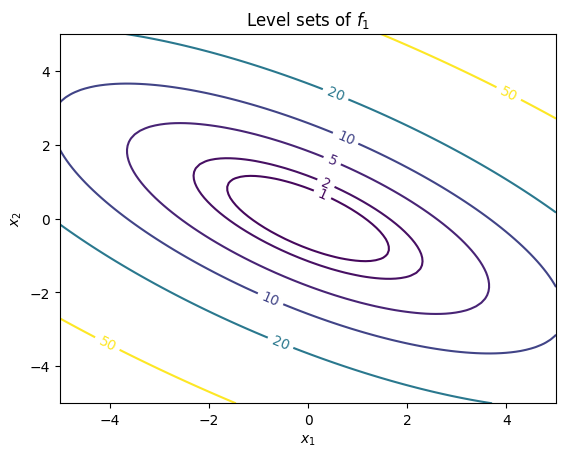

In [18]:
from utils import *

plot_levelSets(pb1.f, pb1.lb, pb1.ub, pb1.nb_points, r"Level sets of $f_1$", pb1.levels)

The file `algorithms.py` already contains an optimization algorithm. This algorithm is called the BFGS algorithm and is contained in the function `BFGS`. Remark that running the `BFGS` function only requires the oracles for $f$ and $\nabla f$, as well as an initial point.

> Try running the `BFGS` algorithm from the starting point $(4,4)$.

In [19]:
from algorithms import BFGS
import problem1 as pb1

x_init = np.array([4.0, 4.0])

x_min = BFGS(pb1.f, pb1.grad_f, x_init)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7


##### 1.b) The Rosenbrock function in dimension 2

The two-dimensional Rosenbrock function is defined for any $x \in \mathbb{R}^2$ by $f_2(x) = 100(x_2 - x_1^2)^2 + (1-x_1)^2$.
This is well-known benchmark for optimization algorithms.

> Implement the first-order and second-order oracle of the Rosenbrock function $f_2$ in the file `problem2.py`.

> Plot the level sets of the Rosenbrock function. Compare the shapes of the level sets of $f_1$ and those of $f_2$.

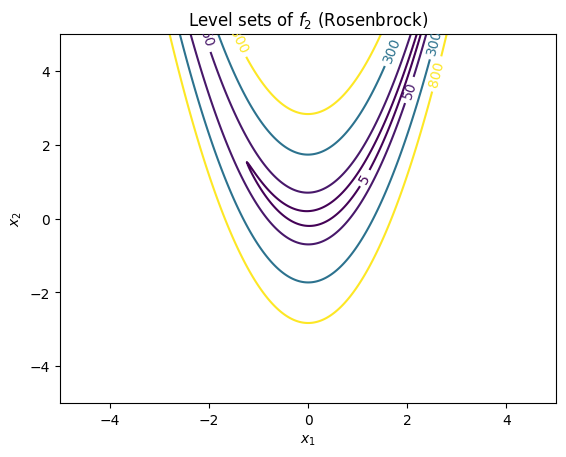

In [20]:
import problem2 as pb2
from utils import plot_levelSets

# --- Implementing Missing Oracles for Problem 2 (Rosenbrock) ---
def grad_f2(x):
    """First-order oracle for Rosenbrock function."""
    x1, x2 = x[0], x[1]
    # df/dx1 = -400*x1*(x2 - x1^2) - 2*(1 - x1)
    g1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    # df/dx2 = 200*(x2 - x1^2)
    g2 = 200 * (x2 - x1**2)
    return np.array([g1, g2])

def hessian_f2(x):
    """Second-order oracle for Rosenbrock function."""
    x1, x2 = x[0], x[1]
    h11 = -400 * (x2 - 3 * x1**2) + 2
    h12 = -400 * x1
    h22 = 200
    return np.array([[h11, h12], [h12, h22]])

# Assign these to the module so BFGS can use them via pb2
pb2.grad_f = grad_f2
pb2.hessian_f = hessian_f2

# --- Plotting ---
plot_levelSets(pb2.f, pb2.lb, pb2.ub, pb2.nb_points, r"Level sets of $f_2$ (Rosenbrock)", pb2.levels)

> Try running the `BFGS` algorithm on $f_2$ from the starting point $(-4,-4)$.

In [21]:
x_min_rosen = BFGS(pb2.f, pb2.grad_f, x_init)
print(f"Rosenbrock minimizer found: {x_min_rosen}")

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 47
         Function evaluations: 64
         Gradient evaluations: 64
Rosenbrock minimizer found: [0.99999988 0.99999976]


> Based on the information displayed by the `BFGS` solver, how does the difficulty of solving $f_1$ compares to the difficulty of solving $f_2$?

### 2) First optimization concepts in the unconstrained case

For the moment, we will consider an objective function $f : \mathbb{R}^d \rightarrow \mathbb{R}$ and $C = \mathbb{R}^d$, meaning that we do not impose constraints on the admissible space. We will also assume that $f$ is twice-differentiable.


We know already that $x_*$ is a global minimizer of $f$ on $\mathbb{R}^d$ if and only if $f(x_*) \leq f(x)$ for any $x \in \mathbb{R}^d$.

A weaker condition is the following. We say that $x_*$ is a local minimizer of $f$ if and only if there exists $R > 0$ such that $f(x_*) \leq f(x)$ for any $x \in \{ x \in \mathbb{R}^d \mid \|x - x_* \| \leq R \}$.


Checking if a point $x_*$ returned by an algorithm is a global or local minimizer is a difficult task.
Thus, we introduce the following definitions, which can easily be checked numerically.

A point $x_* \in \mathbb{R}^d$ is called a first-order stationary point of $f$ if and only if
$$
\nabla f(x_*) = 0.
$$
Remark that if $x_*$ is a global or local minimizer, then $x_*$ is a first-order stationary point.
However, remark that maximizers are also first-order stationary points, so the converse is not true.

In order to be able to discriminate between minimizers and maximizers, we will the notion of second-order stationary points.
The point $x_* \in \mathbb{R}^d$ is called a second-order stationary point if and only if
$$
\begin{cases}
\nabla f(x_*) = 0,\\
\nabla^2 f(x_*) \succcurlyeq 0.
\end{cases}
$$
Remark that global and local minimizers are second-order stationary points, but maximizers are not. However, a second-order stationary point is not necessarily a local minimizer (think of the function $x \longmapsto x^3$ at the point $x_* = 0$).

In order to get a sufficient condition, we need to a notion that is a bit stronger than second-order stationarity. Namely, if $x_* \in \mathbb{R}^d$ is such that $\nabla f(x_*) = 0$ and $\nabla^2 f(x_*) \succ 0$, then $x_*$ is a local minimizer of $f$.

Remark that all these notions can be transposed to the case of local maximizers by considering negative semi-definite or negative definite Hessian matrices.

##### 2.a) Checking stationary 

We will use the notions of stationarity to inspect candidate minimizers of $f_1$ and $f_2$.

> Check that $x_* = (0,0)$ is a first-order stationary point of $f_1$. What else can you say?

In [22]:
x_star = np.array([0.0, 0.0])

grad_val = pb1.grad_f(x_star)
hessian_val = pb1.hessian_f(x_star)
eig_vals = np.linalg.eigvals(hessian_val)

print(f"Gradient at {x_star}: {grad_val}")
print(f"Hessian Eigenvalues: {eig_vals}")

if np.allclose(grad_val, 0):
    print("-> It is a first-order stationary point.")
if np.all(eig_vals > 0):
    print("-> Hessian is Positive Definite: It is a strict local minimizer.")

Gradient at [0. 0.]: [0. 0.]
Hessian Eigenvalues: [0.57294902 3.92705098]
-> It is a first-order stationary point.
-> Hessian is Positive Definite: It is a strict local minimizer.


> Check that $x_* = (1,1)$ is a first-order stationary point of $f_2$. What else can you say?

In [23]:
x_star = np.array([1.0, 1.0])

grad_val = pb2.grad_f(x_star)
hessian_val = pb2.hessian_f(x_star)
eig_vals = np.linalg.eigvals(hessian_val)

print(f"Gradient at {x_star}: {grad_val}")
print(f"Hessian Eigenvalues: {eig_vals}")

if np.allclose(grad_val, 0):
    print("-> It is a first-order stationary point.")
if np.all(eig_vals > 0):
    print("-> Hessian is Positive Definite: It is a strict local minimizer.")

Gradient at [1. 1.]: [-0.  0.]
Hessian Eigenvalues: [1.00160064e+03 3.99360767e-01]
-> It is a first-order stationary point.
-> Hessian is Positive Definite: It is a strict local minimizer.


> From the level sets of $f_1$ and $f_2$, do you think that $f_1$ or $f_2$ admit other first-order stationary points?

##### A more complex situation: The Himmelblau function

We introduce now the Himmelblau function defined for any $x \in \mathbb{R}^d$ by $f_3(x) = (x_1^2 + x_2 - 11)^2  + (x_1 + x_2^2 - 7)^2$.
Oracles associated to $f_3$ are implemented in `problem3.py'.

> Implement the first-order and second-order oracle of $f_3$ in the file `problem3.py`.

> Plot the level sets of $f_3$.

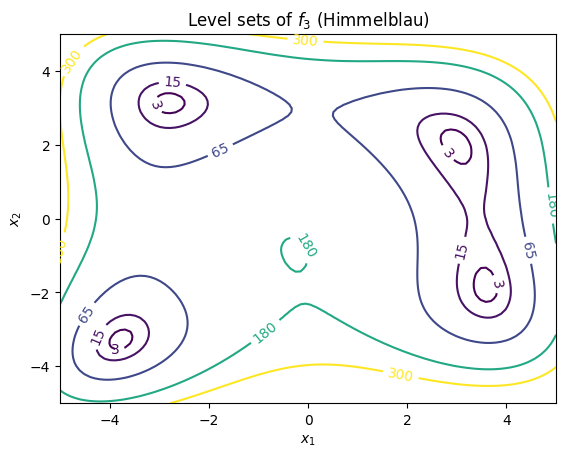

In [24]:
import problem3 as pb3

# --- Implementing Missing Oracles for Problem 3 (Himmelblau) ---
def grad_f3(x):
    x1, x2 = x[0], x[1]
    # Derivatives of (x1^2 + x2 - 11)^2 + (x1 + x2^2 - 7)^2
    df_dx1 = 4 * x1 * (x1**2 + x2 - 11) + 2 * (x1 + x2**2 - 7)
    df_dx2 = 2 * (x1**2 + x2 - 11) + 4 * x2 * (x1 + x2**2 - 7)
    return np.array([df_dx1, df_dx2])

def hessian_f3(x):
    x1, x2 = x[0], x[1]
    h11 = 12 * x1**2 + 4 * x2 - 42
    h12 = 4 * (x1 + x2)
    h21 = h12
    h22 = 4 * x1 + 12 * x2**2 - 26
    return np.array([[h11, h12], [h21, h22]])

# Assign to module
pb3.grad_f = grad_f3
pb3.hessian_f = hessian_f3

# --- Plotting ---
plot_levelSets(pb3.f, pb3.lb, pb3.ub, pb3.nb_points, r"Level sets of $f_3$ (Himmelblau)", pb3.levels)

> Check that $x_* = (3,2)$ is a second-order stationary point. What else can you say?

In [25]:
x_star = np.array([3.0, 2.0])

grad_val = pb3.grad_f(x_star)
hess_val = pb3.hessian_f(x_star)
eigs = np.linalg.eigvals(hess_val)

print(f"Gradient: {grad_val}")
print(f"Eigenvalues: {eigs}")
# Positive eigenvalues => Local minimizer

Gradient: [0. 0.]
Eigenvalues: [82.28427125 25.71572875]


> What can you say about the point $x_* = (-0.270845, -0.923039)$?

In [26]:
x_star = np.array([-0.270845, -0.923039])

grad_val = pb3.grad_f(x_star)
hess_val = pb3.hessian_f(x_star)
eigs = np.linalg.eigvals(hess_val)

print(f"Gradient: {grad_val}")
print(f"Eigenvalues: {eigs}")
# Note: If one eigenvalue is positive and one is negative, it is a Saddle Point.

Gradient: [2.04610076e-05 9.43225117e-06]
Eigenvalues: [-45.60522931 -16.06601057]


> According to you, how many first-order stationary points does $f_3$ have?

> Plot the level sets of $x \longmapsto \| \nabla f_3(x) \|$ to verify your hypothesis.

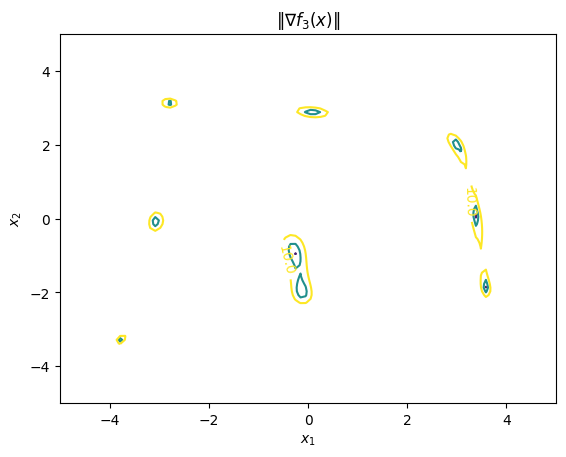

In [27]:

def norm_grad_f3(x):
    # axis=0 ensures we calculate the norm vector-wise (down the stack)
    # rather than flattening the entire grid into a single scalar.
    return np.linalg.norm(pb3.grad_f(x), axis=0)

grad_levels = [0.1, 0.5, 1.0, 5.0, 10.0]

plot_levelSets(norm_grad_f3, pb3.lb, pb3.ub, pb3.nb_points, r"$\| \nabla f_3(x) \|$", grad_levels)

> Try running the `BFGS` algorithm on the objective function $f_3$ from the points $(-2,-2)$, $(-2, 2)$, $(2,2)$ and $(2,-2)$. What do you notice?

In [28]:
starting_points = [
    np.array([-2.0, -2.0]), 
    np.array([-2.0, 2.0]), 
    np.array([2.0, 2.0]), 
    np.array([2.0, -2.0])
]

for i, x0 in enumerate(starting_points):
    res = BFGS(pb3.f, pb3.grad_f, x0)
    print(f"Start: {x0} -> Converged to: {res}")



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
Start: [-2. -2.] -> Converged to: [-3.77931025 -3.28318599]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Start: [-2.  2.] -> Converged to: [-2.80511808  3.13131254]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Start: [2. 2.] -> Converged to: [3.00000004 2.00000002]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Start: [ 2. -2.] -> Converged to: [ 3.58442834 -1.84812654]
